# Setup

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
from os.path import dirname, abspath
import sys
sys.path.append("/Users/soid/Dropbox/Code/2020/columbia-catalog")
sys.path.append(os.path.join('D:\\', 'Dropbox', 'Code', '2020', 'columbia-catalog'))

from cu_catalog import config

import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

import numpy as np


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import torch

import textdistance

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soide\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Install needed packages

In [3]:
!{sys.executable} -m pip install 'Unidecode'

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import sys
!{sys.executable} -m pip install 'sklearn'
!{sys.executable} -m pip install 'pandas'
!{sys.executable} -m pip install 'cufflinks'
!{sys.executable} -m pip install 'textdistance[extras]'
!{sys.executable} -m pip install 'chart_studio'
!{sys.executable} -m pip install 'nltk'
!{sys.executable} -m pip install 'matplotlib'
!{sys.executable} -m pip install 'transformers'
!{sys.executable} -m pip install 'datasets'
!{sys.executable} -m pip install 'tensorflow'
!{sys.executable} -m pip install 'torch'
!{sys.executable} -m pip install 'Unidecode'

ERROR: Invalid requirement: "'sklearn'"
ERROR: Invalid requirement: "'pandas'"
ERROR: Invalid requirement: "'cufflinks'"
ERROR: Invalid requirement: "'textdistance[extras]'"
ERROR: Invalid requirement: "'chart_studio'"
ERROR: Invalid requirement: "'nltk'"
ERROR: Invalid requirement: "'matplotlib'"
ERROR: Invalid requirement: "'transformers'"
ERROR: Invalid requirement: "'datasets'"
ERROR: Invalid requirement: "'tensorflow'"
ERROR: Invalid requirement: "'torch'"
ERROR: Invalid requirement: "'Unidecode'"


# Wiki Search Results Classifier

In [6]:
import wiki_search_train

model = wiki_search_train.WikiSearchClassifier()

In [7]:
model.load_training_data()
data = model.data
display(data)

Initial data for training before balancing:
0    741
1     53
2     31
Name: search_results.label, dtype: int64
Train set:
0    593
1     42
2     25
Name: search_results.label, dtype: int64
Test set:
0    148
1     11
2      6
Name: search_results.label, dtype: int64


,search_results.title,search_results.snippet,search_results.label,name,department
0,Haruo Shirane,"Columbia University Press. Shirane, Haruo, ed....",1,Haruo Shirane,East Asian Languages and Cultures\t
1,James Schamus,"FilmDistrict. Schamus was born in Detroit, Mic...",1,James A Schamus,Film
2,Delphine Fawundu,Adama Delphine Fawundu (born 1971) is an Ameri...,2,Delphine A Fawundu,Visual Arts
3,Christine Blasey Ford,Christine Margaret Blasey Ford (/ˈblɑːzi/; bor...,0,Christine S Low,Social Work
4,Christine Gregoire,Christine &quot;Chris&quot; O'Grady Gregoire (...,0,Christine S Low,Social Work
...,...,...,...,...,...
820,W. John Kress,Retrieved 2018-10-18. &quot;2013 W. John Kress...,0,John A Gentry,International and Public Affairs
821,Todd Gitlin,"Todd Alan Gitlin (born January 6, 1943) is an ...",1,Todd Gitlin,Journalism
822,List of Mad Men characters,talks Ginsberg's breakdown&quot;. CBS News. 20...,0,Phillip L Marotta,Social Work
823,Axel Honneth,"Axel Honneth (/ˈhɒnɪt, -ɛt/; German: [aksl̩ ˈh...",1,Axel Honneth,Philosophy


In [8]:
model.fit()
model.evaluate()

Evaluating test data set:
  Misclassified as irrelevant but are relevant (no big deal): [15, 21, 45, 61, 138, 159]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.62      0.91      0.74        11
           2       0.00      0.00      0.00         6

    accuracy                           0.95       165
   macro avg       0.54      0.63      0.58       165
weighted avg       0.93      0.95      0.94       165

Predicted:
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
True:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0


C:\Users\soide\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Misclassified as irrelevant but are relevant (no big deal): [2, 60, 61, 92, 159, 168, 227, 254, 436, 498, 713, 758, 806]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       0.80      0.98      0.88        53
           2       1.00      0.58      0.73        31

    accuracy                           0.98       825
   macro avg       0.93      0.85      0.87       825
weighted avg       0.98      0.98      0.98       825

Confusion Matrix:
            Irrelevant  Possible  Relevant
Irrelevant         740         1         0
Possible             1        52         0
Relevant             1        12        18


# Wiki Search BERT classifier

In [6]:
from cu_catalog.models import wiki_search_bert

model2 = wiki_search_bert.WikiSearchClassifier()

In [7]:
model2.load_training_data()
data = model2.data
display(data)

Using custom data configuration default-0aef5ca27a7801bd
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-0aef5ca27a7801bd\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)
Using custom data configuration default-0aef5ca27a7801bd
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-0aef5ca27a7801bd\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)
Using custom data configuration default-0aef5ca27a7801bd
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-0aef5ca27a7801bd\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)


Initial data for training:
0    741
1     53
2     31
Name: search_results.label, dtype: int64


Dataset({
    features: ['search_results.title', 'search_results.snippet', 'search_results.label', 'name', 'department', 'labels'],
    num_rows: 825
})

In [8]:
print(model2.dataset_train)
d = model2.fit()
d

Dataset({
    features: ['search_results.title', 'search_results.snippet', 'search_results.label', 'name', 'department', 'labels'],
    num_rows: 699
})


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier

  0%|          | 0/699 [00:00<?, ?ex/s]

  0%|          | 0/126 [00:00<?, ?ex/s]

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: search_results.snippet, name, department, search_results.title, search_results.label. If search_results.snippet, name, department, search_results.title, search_results.label are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\soide\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 699
  Num Epochs = 20
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimi

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.080802,0.785714,0.726126
2,0.981400,0.911683,0.817460,0.797095
3,0.594500,0.795955,0.896825,0.895645
4,0.594500,0.655464,0.936508,0.935809
5,0.416500,0.424201,0.944444,0.944444
6,0.299400,0.379676,0.936508,0.937550
7,0.299400,0.299984,0.952381,0.952982
8,0.132500,0.242617,0.952381,0.952982
9,0.118600,0.343339,0.960317,0.960224
10,0.118600,0.228743,0.952381,0.952982


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: search_results.snippet, name, department, search_results.title, search_results.label. If search_results.snippet, name, department, search_results.title, search_results.label are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 126
  Batch size = 32
Saving model checkpoint to D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-22
Configuration saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-22\config.json
Model weights saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-22\pytorch_model.bin
tokenizer config file saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-22\tokenizer_config.json
Special tokens file saved in D:\my-stuff\cu-catalog-

In [12]:
model2.dataset_train[55]

{'search_results.title': 'Natalie Maines',
 'search_results.snippet': "1, 2007. Rosen, Craig (December 3, 1999). &quot;Dixie Chicks And Sheryl Crow Prove They're Gutsy Women&quot;. Yahoo!Music. Retrieved June 1, 2007. &quot;A jewel of an",
 'search_results.label': 0,
 'name': 'Louise A Rosen',
 'department': 'International and Public Affairs',
 'labels': 0}

In [16]:
import cu_catalog
cu_catalog.config.DATA_WIKI_SEARCH_MODEL_FILENAME

'D:\\my-stuff\\cu-catalog-temp/instructor-search-results.model'

In [13]:
model2.evaluate()

Evaluating test data set:
  Misclassified as irrelevant but are relevant (no big deal): []
  Misclassified as relevant but are not (big deal, unless mistake in dataset): []

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       0.80      0.94      0.86        17
           2       1.00      0.83      0.91        12

    accuracy                           0.96       126
   macro avg       0.93      0.92      0.92       126
weighted avg       0.96      0.96      0.96       126

Predicted:
[1 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 2 2 1 0 0 0 1 2 0 0 2 0 2 0 1 0 0 0 0 1 0 0 2 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
True:
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 0
 0 0 1 0 1 0 0 1 0 1 0 0 2 2 1 0 0 0 2 2 0 0 2 0 2 0 1 0 0 0 0 1 0 0 2 0 1
 0 0 0 1 0 0 0 0 0 0 

In [ ]:
model2.persist_model()

In [ ]:
model2.load_model()

In [ ]:
#model2.dataset_test['labels']
model2.dataset_test[55]

In [ ]:
r = model2.predict_proba(model2.dataset_test)
r[14]

# Wiki Article Classifier

In [5]:
from cu_catalog.models import wiki_article

wac_model = wiki_article.WikiArticleClassifier()

In [14]:
wac_model.load_training_data()
#wac_model.data[:]

Using custom data configuration default-7f9112010e357534
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-7f9112010e357534\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)
Using custom data configuration default-7f9112010e357534
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-7f9112010e357534\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)
Using custom data configuration default-7f9112010e357534
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-7f9112010e357534\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)


Initial all data:
0    333
1    100
Name: label, dtype: int64

Train set:
0    229
1     74
Name: label, dtype: int64

Test set:
0    104
1     26
Name: label, dtype: int64


In [ ]:
wac_model.fit()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

  0%|          | 0/303 [00:00<?, ?ex/s]

  0%|          | 0/130 [00:00<?, ?ex/s]

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: name, course_descr, department, wiki_page, wiki_title. If name, course_descr, department, wiki_page, wiki_title are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\soide\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 303
  Num Epochs = 20
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 1520
  Number of trainable parameters = 66955010


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.321200,0.266148,0.923077,0.919139
2,0.043400,0.145217,0.961538,0.960634
3,0.002800,0.125994,0.953846,0.954477
4,0.001400,0.104622,0.969231,0.969231


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: name, course_descr, department, wiki_page, wiki_title. If name, course_descr, department, wiki_page, wiki_title are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 130
  Batch size = 4
Saving model checkpoint to D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-76
Configuration saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-76\config.json
Model weights saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-76\pytorch_model.bin
tokenizer config file saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-76\tokenizer_config.json
Special tokens file saved in D:\my-stuff\cu-catalog-temp/instructor-article.checkpoints\checkpoint-76\special_token

In [17]:
wac_model.persist_model()

Saving model checkpoint to D:\my-stuff\cu-catalog-temp/instructor-article.model
Configuration saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\config.json
Model weights saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\pytorch_model.bin
tokenizer config file saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\tokenizer_config.json
Special tokens file saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\special_tokens_map.json


In [18]:
wac_model.load_model()

loading file vocab.txt
loading file tokenizer.json
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading configuration file D:\my-stuff\cu-catalog-temp/instructor-article.model\config.json
Model config DistilBertConfig {
  "_name_or_path": "D:\\my-stuff\\cu-catalog-temp/instructor-article.model",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.25.1",
  "vocab_size": 30522
}

loading weights file D:\my-stuff\cu-catalog-temp/instructor-article.model\pyt

In [19]:
#wac_model.threshold = 0.50
wac_model.evaluate()

Evaluating test data set:
  Misclassified as irrelevant but are relevant: [6, 76]
  Misclassified as relevant but are not: [29, 30]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.92      0.92      0.92        26

    accuracy                           0.97       130
   macro avg       0.95      0.95      0.95       130
weighted avg       0.97      0.97      0.97       130

Predicted:
[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
True:
[0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 

In [21]:
wac_model.dataset_test[30]

{'name': 'John W McCormack',
 'department': 'English @Barnard; English and Comparative Literature; Writing',
 'course_descr': '',
 'wiki_title': 'John W. McCormack Graduate School of Policy and Global Studies',
 'wiki_page': 'The John W. McCormack Graduate School of Policy Studies at UMass Boston was founded in 2003 and grew out of the John W. McCormack Institute for Public Affairs which opened in 1983. In 2010, the school expanded its mission and name. The McCormack Graduate School also provides editorial management of the New England Journal of Public Policy and two peer-reviewed academic journals, the Journal of Aging and Social Policy and Research on Aging.\n\n\n== Graduate degree and Certificate programs ==\nConflict resolution (Graduate certificates, MA degree)\nGerontology (Graduate certificates, MS and PhD degrees)\nGlobal Governance and Human Security (PhD degree)\nInternational Relations (MSPA degree)\nPublic Affairs (MSPA degree)\nPublic Policy (PhD degree)\nWomen in Politic

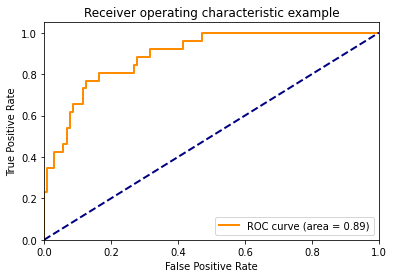

In [24]:
# Plotting ROC curve
from sklearn.metrics import roc_curve, auc

# from https://medium.com/analytics-vidhya/easily-implement-different-transformers-through-hugging-face-e471035e9c86
def roc_curve_plot(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' %roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

proba = wac_model.predict_proba(wac_model.dataset_test)

fpr, tpr, thresholds = roc_curve(wac_model.dataset_test['label'], proba)
roc_auc = auc(fpr, tpr)
roc_curve_plot(fpr, tpr, roc_auc)

# np.argmax(proba)

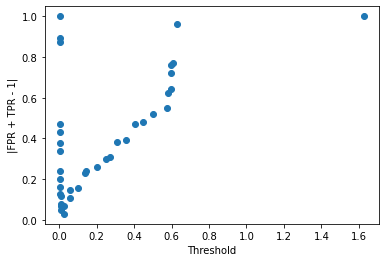

In [25]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [42]:
thresholds

array([1.8845391 , 0.8845391 , 0.87678367, 0.8760972 , 0.8725164 ,
       0.87247497, 0.871106  , 0.8702101 , 0.8322895 , 0.83009756,
       0.80652404, 0.7974503 , 0.72910005, 0.6495897 , 0.6060107 ,
       0.5652269 , 0.4276416 , 0.3908765 , 0.03486022, 0.03476772,
       0.01773071], dtype=float32)

In [31]:
wac_model.view_sample(22)

{'name': {0: 'Gerard F Parkin'}, 'department': {0: 'Chemistry'}, 'course_descr': {0: 'The use of multinuclear NMR spectroscopy in the determination of the structures of inorganic molecules and the use of dynamic NMR spectroscopy (variable temperature NMR and magnetization transfer techniques) to provide information concerned with reaction mechanisms.\n'}, 'wiki_title': {0: 'Gerard Parkin'}, 'wiki_page': {0: 'Gerard "Ged" F. R. Parkin (born 15 February 1959) is a professor of chemistry at Columbia University.\n\n\n== Biography ==\nGerard Parkin attended the English Martyrs School and Sixth Form College before working under Malcolm Green during both his undergraduate and graduate studies at Queens College of Oxford University.  His work involved exploring the chemistry of tungsten phosphine derivatives.  He obtained a post-doctoral position at the California Institute of Technology working with Professor John Bercaw on tungstenocene reactivity.  In 1988, Ged joined the faculty at Columbi

In [39]:
wac_model.dataset_test[87]

{'name': 'Richard Goldberg',
 'department': 'Enterprise Risk Management; International and Public Affairs',
 'course_descr': '',
 'wiki_title': 'Richard Zare',
 'wiki_page': 'Richard Neil Zare (born November 19, 1939 in Cleveland, Ohio) is the Marguerite Blake Wilbur Professor in Natural Science and a Professor of Chemistry at Stanford University. Throughout his career, Zare has made a considerable impact in physical chemistry and analytical chemistry, particularly  through the development of laser-induced fluorescence (LIF) and the study of chemical reactions at the molecular and nanoscale level. LIF is an extremely sensitive technique with applications ranging from analytical chemistry and molecular biology to astrophysics. One of its applications was the sequencing of the human genome.Zare is known for his enthusiasm for science and his exploration of new areas of research.  He has mentored over 150 PhD students and postdoctoral researchers, of whom more than 49 are women or members

# Experimental Models

In [817]:
# experiment: NB on separate labels into two models
y1_train = y_train.apply(lambda x: 1 if x == 1 else 0)
y2_train = y_train.apply(lambda x: 1 if x == 2 else 0)
y1_test = y_test.apply(lambda x: 1 if x == 1 else 0)
y2_test = y_test.apply(lambda x: 1 if x == 2 else 0)

print("label = 1")
clf = GaussianNB()
clf.fit(X_train, y1_train)
ypred = clf.predict(X_test)
eval_results(y1_test, ypred)
print()

print("label = 2")
clf = GaussianNB()
clf.fit(X_train, y2_train)
ypred = clf.predict(X_test)
eval_results(y2_test, ypred)

label = 1
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.57      0.67      0.62         6

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18

predicted:
[0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0]
true:
[0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1]


search_results.label     
2                     494    0
0                     730    0
1                     53     1
                      362    1
2                     299    0
1                     656    1
0                     394    0
2                     749    0
                      760    0
0                     647    0
                      258    0
                      652    0
1                     130    1
2                     748    0
                      405    0
1                     129    1
0                     318    0
1                     0      1
Name: search_results.label, dtype: int64


label = 2
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.33      0.50         6

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18

predicted:
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
true:
[1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0]


search_results.label     
2                     494    1
0                     730    0
1                     53     0
                      362    0
2                     299    1
1                     656    0
0                     394    0
2                     749    1
                      760    1
0                     647    0
                      258    0
                      652    0
1                     130    0
2                     748    1
                      405    1
1                     129    0
0                     318    0
1                     0      0
Name: search_results.label, dtype: int64

In [818]:
# Train multi-class model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Evaluate model
ypred = clf.predict(X_test)
eval_results(y_test, ypred)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.50      0.67      0.57         6
           2       0.67      0.67      0.67         6

    accuracy                           0.67        18
   macro avg       0.72      0.67      0.68        18
weighted avg       0.72      0.67      0.68        18

predicted:
[2 0 1 1 2 2 0 2 1 0 1 1 1 1 2 1 0 2]
true:
[2 0 1 1 2 1 0 2 2 0 0 0 1 2 2 1 0 1]


search_results.label     
2                     494    2
0                     730    0
1                     53     1
                      362    1
2                     299    2
1                     656    1
0                     394    0
2                     749    2
                      760    2
0                     647    0
                      258    0
                      652    0
1                     130    1
2                     748    2
                      405    2
1                     129    1
0                     318    0
1                     0      1
Name: search_results.label, dtype: int64

# Precision/Recall Trade-off Calculation

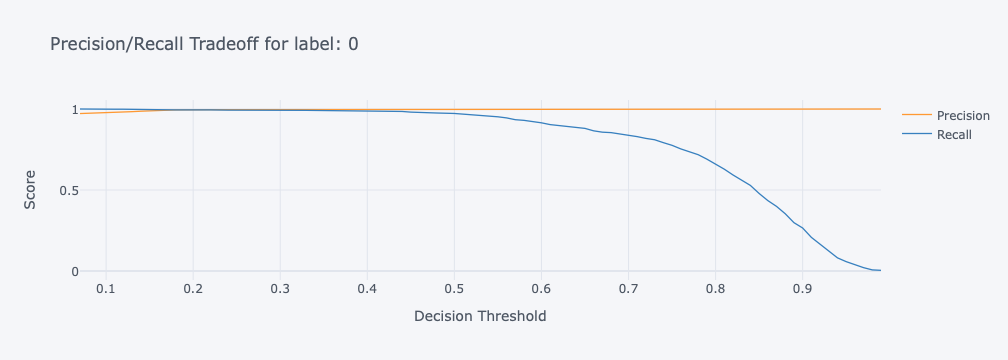

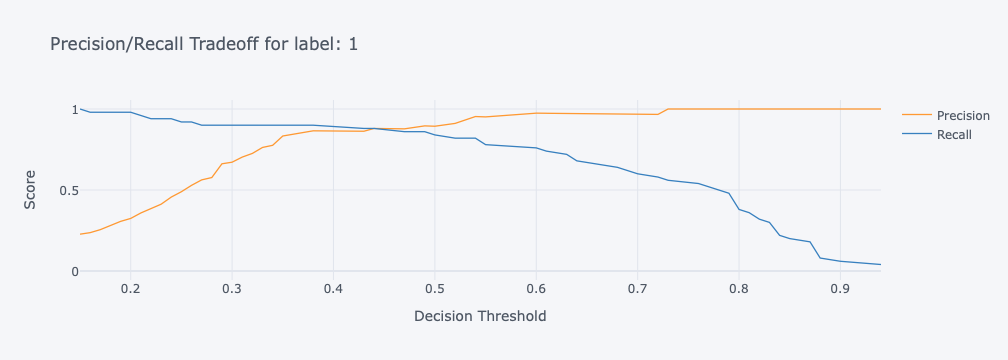

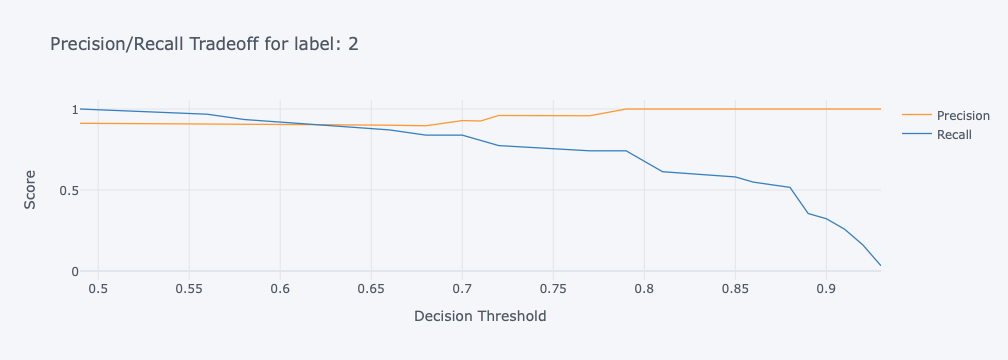

In [22]:
# taken from https://www.kaggle.com/kevinarvai/fine-tuning-a-classifier-in-scikit-learn

from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier

import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot


def test():
    clf_o = OneVsRestClassifier(RandomForestClassifier())
    
    y_train_bins = preprocessing.label_binarize(model.y_train, classes=[0, 1, 2])
    clf_o.fit(model.X_train, y_train_bins)
    
    X = list(data.apply(lambda x: model.extract_features2vector(x.to_dict()), axis=1))
    y = data['search_results.label']
    
    
    y_scores = clf_o.predict_proba(X)
    y_bins = preprocessing.label_binarize(y, classes=[0, 1, 2])
    
    cufflinks.go_offline()
    cufflinks.set_config_file(world_readable=True, theme='pearl')

    for i in range(3):
        precision_recall = precision_recall_curve(y_bins[:, i], y_scores[:, i])
        precision_recall = pd.DataFrame.from_records(precision_recall).T
        precision_recall.columns = ['Precision', 'Recall', 'Thresholds']
        precision_recall.iplot(x='Thresholds', xTitle='Decision Threshold',yTitle='Score', 
                               title='Precision/Recall Tradeoff for label: ' + str(i))

test()

# Draft

In [15]:
# Viewing samples and its features
model.view_sample(2)
model.view_sample(188)
model.view_sample(254)
model.view_sample(237)
model.view_sample(462)

{'search_results.title': 'Delphine Fawundu', 'search_results.snippet': 'Adama Delphine Fawundu (born 1971) is an American multi-disciplinary photographer and visual artist promoting African culture and heritage, a co-founder', 'search_results.label': 2, 'name': 'Delphine A Fawundu', 'department': 'Visual Arts'}
{'__name_match_title': True, '__name_match_title2': True, '__name_similarity_title': 0.9652777777777778, '__name_match_snippet': True, '__name_match_snippet2': True, '__department_similarity_snippet': 0.5249601275917065, '__columbia_match_snippet': False, '__word_adama': True, '__word_delphin': True, '__word_fawundu': True, '__word_(': True, '__word_born': True, '__word_1971': True, '__word_)': True, '__word_is': True, '__word_an': True, '__word_american': True, '__word_multi-disciplinari': True, '__word_photograph': True, '__word_and': True, '__word_visual': True, '__word_artist': True, '__word_promot': True, '__word_african': True, '__word_cultur': True, '__word_heritag': True

,search_results.title,search_results.snippet,search_results.label,name,department
2,Delphine Fawundu,Adama Delphine Fawundu (born 1971) is an Ameri...,2,Delphine A Fawundu,Visual Arts


{'search_results.title': 'Mark N. Brown', 'search_results.snippet': 'Mark Neil Brown (born November 18, 1951) is an American engineer, retired colonel in the United States Air Force and former NASA astronaut. Brown spent', 'search_results.label': 1, 'name': 'Mark Brown', 'department': 'Statistics'}
{'__name_match_title': True, '__name_match_title2': True, '__name_similarity_title': 0.9138461538461539, '__name_match_snippet': True, '__name_match_snippet2': True, '__department_similarity_snippet': 0.3799116997792493, '__columbia_match_snippet': False, '__word_mark': True, '__word_neil': True, '__word_brown': True, '__word_(': True, '__word_born': True, '__word_novemb': True, '__word_18': True, '__word_,': True, '__word_1951': True, '__word_)': True, '__word_is': True, '__word_an': True, '__word_american': True, '__word_engin': True, '__word_retir': True, '__word_colonel': True, '__word_in': True, '__word_the': True, '__word_unit': True, '__word_state': True, '__word_air': True, '__word_f

,search_results.title,search_results.snippet,search_results.label,name,department
188,Mark N. Brown,"Mark Neil Brown (born November 18, 1951) is an...",1,Mark Brown,Statistics


{'search_results.title': 'David Rosner', 'search_results.snippet': 'David Rosner is the Ronald H. Lauterstein Professor of Sociomedical Sciences and professor of history in the Graduate School of Arts and Sciences at Columbia', 'search_results.label': 2, 'name': 'David Rosner', 'department': 'Sociomedical Sciences'}
{'__name_match_title': True, '__name_match_title2': True, '__name_similarity_title': 1.0, '__name_match_snippet': True, '__name_match_snippet2': True, '__department_similarity_snippet': 0.5842685269436861, '__columbia_match_snippet': True, '__word_david': True, '__word_rosner': True, '__word_is': True, '__word_the': True, '__word_ronald': True, '__word_H.': True, '__word_lauterstein': True, '__word_professor': True, '__word_of': True, '__word_sociomed': True, '__word_scienc': True, '__word_and': True, '__word_histori': True, '__word_in': True, '__word_graduat': True, '__word_school': True, '__word_art': True, '__word_at': True, '__word_columbia': True}


,search_results.title,search_results.snippet,search_results.label,name,department
254,David Rosner,David Rosner is the Ronald H. Lauterstein Prof...,2,David Rosner,Sociomedical Sciences


{'search_results.title': 'Andrew Jacobs (journalist)', 'search_results.snippet': 'Andrew Jacobs is an American correspondent for The New York Times. Jacobs has been based in Beijing, China, since April 2008, covering the country for', 'search_results.label': 1, 'name': 'Andrew Jacobs', 'department': 'Finance'}
{'__name_match_title': True, '__name_match_title2': True, '__name_similarity_title': 0.9, '__name_match_snippet': True, '__name_match_snippet2': True, '__department_similarity_snippet': 0.5393650793650794, '__columbia_match_snippet': False, '__word_andrew': True, '__word_jacob': True, '__word_is': True, '__word_an': True, '__word_american': True, '__word_correspond': True, '__word_for': True, '__word_the': True, '__word_new': True, '__word_york': True, '__word_time': True, '__word_.': True, '__word_ha': True, '__word_been': True, '__word_base': True, '__word_in': True, '__word_beij': True, '__word_,': True, '__word_china': True, '__word_sinc': True, '__word_april': True, '__word_

,search_results.title,search_results.snippet,search_results.label,name,department
237,Andrew Jacobs (journalist),Andrew Jacobs is an American correspondent for...,1,Andrew Jacobs,Finance


{'search_results.title': 'Michael Eric Dyson', 'search_results.snippet': 'Michael Eric Dyson (born 1958) is an academic, author, preacher, and radio host. He is Professor of Sociology at Georgetown University. Described by Michael', 'search_results.label': 0, 'name': 'Michael P McNeil', 'department': 'Sociomedical Sciences'}
{'__name_match_title': False, '__name_match_title2': False, '__name_similarity_title': 0.8761752136752138, '__name_match_snippet': False, '__name_match_snippet2': False, '__department_similarity_snippet': 0.5845543345543346, '__columbia_match_snippet': False, '__word_michael': True, '__word_eric': True, '__word_dyson': True, '__word_(': True, '__word_born': True, '__word_1958': True, '__word_)': True, '__word_is': True, '__word_an': True, '__word_academ': True, '__word_,': True, '__word_author': True, '__word_preacher': True, '__word_and': True, '__word_radio': True, '__word_host': True, '__word_.': True, '__word_He': True, '__word_professor': True, '__word_of': Tr

,search_results.title,search_results.snippet,search_results.label,name,department
462,Michael Eric Dyson,"Michael Eric Dyson (born 1958) is an academic,...",0,Michael P McNeil,Sociomedical Sciences


In [54]:
# testing NB on small data
def test():
    X = np.array([{"a": True, "b": True}, {"a": True, "c": True}, {"b": True, "d": True}])
    Y = np.array([1, 1, 2])
    # Y = np.array([[1, 0], [1, 0], [0, 1]])

    d2v = get_dict2vec_converter(X)

    vecX = []
    for x in X:
        vecX.append(d2v(x))
    vecX = np.array(vecX)

    clf = GaussianNB()
    clf.fit(vecX, Y)
    test = d2v({'b': True})
    print(test)
    print(clf.predict([test]))
test()

[False, True, False, False]
[2]


In [16]:
# evaluating string distance/similarity functions
def test_distances(name, words_match_partial):
    print("name: ", name)
    print(words_match_partial("Delphine Fawundu", "Delphine A Fawundu"))
    print(words_match_partial("Mark Brown", "Mark N. Brown"))
    print(words_match_partial("Mark Brown", "Grisha Temchenko"))
    print(words_match_partial("Delphine Fawundu", "Delphine Fawundu"))
    print(words_match_partial("Andrew Jacobs (journalist)", "Andrew Jacobs"))
    print(words_match_partial("Andrew Jacobs", "Andrew Jacobs (journalist)"))
    print(words_match_partial('Michael Eric Dyson (born 1958) is an academic, author, preacher, and radio host. He is Professor of Sociology at Georgetown University. Described by Michael',
                             'Michael P McNeil'))
    print(words_match_partial('Christine Ann Wellington OBE (born 18 February 1977) is an English former professional triathlete and four-time Ironman Triathlon World Champion. She',
                             'Social Work'))
    print(words_match_partial('Adama Delphine Fawundu (born 1971) is an American multi-disciplinary photographer and visual artist promoting African culture and heritage, a co-founder',
                             'Visual Arts'))
    
test_distances("levenshtein", textdistance.levenshtein.normalized_similarity)
test_distances("jaro_winkler", textdistance.jaro_winkler.normalized_similarity)
test_distances("jaccard", lambda x, y: textdistance.jaccard.normalized_similarity(x.lower().split(), y.lower().split()))
test_distances("sorensen", lambda x, y: textdistance.sorensen.normalized_similarity(x.lower().split(), y.lower().split()))

name:  levenshtein
0.8888888888888888
0.7692307692307692
0.125
1.0
0.5
0.5
0.08974358974358976
0.05369127516778527
0.05921052631578949
name:  jaro_winkler
0.9777777777777777
0.9538461538461538
0.46666666666666656
1.0
0.9
0.9
0.5811965811965812
0.4686546674801708
0.5249601275917065
name:  jaccard
0.6666666666666666
0.6666666666666666
0.0
1.0
0.6666666666666666
0.6666666666666666
0.038461538461538436
0.0
0.04761904761904767
name:  sorensen
0.8
0.8
0.0
1.0
0.8
0.8
0.07407407407407407
0.0
0.09090909090909094


In [19]:
from sklearn.metrics import confusion_matrix

# Random forest classifier
clf = RandomForestClassifier(n_jobs=-1, n_estimators=100)#, max_depth=3)
clf.fit(model.X_train, model.y_train)

# evaluate model
ypred = clf.predict(model.X_test)
print(classification_report(model.y_test, ypred))
model.show_true_pred(model.y_test, ypred)
display(model.y_test)

print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(model.y_test, ypred),
        columns=['neg', 'possible', 'match'], index=['neg', 'possible', 'match']))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         7

    accuracy                           0.95        19
   macro avg       0.95      0.94      0.94        19
weighted avg       0.95      0.95      0.95        19

Predicted:
[2 0 0 0 1 2 0 2 2 1 0 1 1 2 2 0 2 1 0]
True:
[2 0 0 0 1 2 0 2 2 1 1 1 1 2 2 0 2 1 0]


search_results.label    
2                     7     2
0                     14    0
                      20    0
                      7     0
1                     14    1
2                     28    2
0                     6     0
2                     6     2
                      13    2
1                     15    1
                      26    1
                      29    1
                      27    1
2                     14    2
                      2     2
0                     10    0
2                     11    2
1                     9     1
0                     28    0
Name: search_results.label, dtype: int64

Confusion Matrix:
          neg  possible  match
neg         6         0      0
possible    1         5      0
match       0         0      7


# DistiBERT

In [52]:
from cu_catalog.models import wiki_article

wac2_model = wiki_article2.WikiArticleClassifier()
wac2_model.load_training_data()

Using custom data configuration default-8e80e9b76d868f6a
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-8e80e9b76d868f6a\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)
Using custom data configuration default-8e80e9b76d868f6a
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-8e80e9b76d868f6a\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)
Using custom data configuration default-8e80e9b76d868f6a
Reusing dataset json (C:\Users\soide\.cache\huggingface\datasets\json\default-8e80e9b76d868f6a\0.0.0\c90812beea906fcffe0d5e3bb9eba909a80a998b5f88e9f8acbd320aa91acfde)


Initial data for training:
0    57
1    34
Name: label, dtype: int64


In [53]:
wac2_model.fit()

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at C:\Users\soide/.cache\huggingface\transformers\23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.15.0",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at C:\Users\soide/.cache\huggingface\transfor

  0%|          | 0/64 [00:00<?, ?ex/s]

  0%|          | 0/27 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: wiki_title, department, course_descr, name, wiki_page.
***** Running training *****
  Num examples = 64
  Num Epochs = 50
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 1600


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.712000,0.690477,0.518519,0.354110
2,0.329800,0.505224,0.740741,0.718908
3,0.295600,0.260076,0.925926,0.925309
4,0.010700,0.679419,0.777778,0.764052
5,0.003700,1.201017,0.777778,0.764052
6,0.004400,0.091509,0.962963,0.962861
7,0.002600,1.004305,0.814815,0.806798
8,0.003000,0.796123,0.814815,0.806798
9,0.001500,0.674099,0.888889,0.887019
10,0.001000,0.751975,0.851852,0.847643


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: wiki_title, department, course_descr, name, wiki_page.
***** Running Evaluation *****
  Num examples = 27
  Batch size = 2
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: wiki_title, department, course_descr, name, wiki_page.
***** Running Evaluation *****
  Num examples = 27
  Batch size = 2
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: wiki_title, department, course_descr, name, wiki_page.
***** Running Evaluation *****
  Num examples = 27
  Batch size = 2
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: wiki_title, departm

In [8]:
wac2_model.persist_model()

Saving model checkpoint to D:\my-stuff\cu-catalog-temp/instructor-article.model
Configuration saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\config.json
Model weights saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\pytorch_model.bin
tokenizer config file saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\tokenizer_config.json
Special tokens file saved in D:\my-stuff\cu-catalog-temp/instructor-article.model\special_tokens_map.json


In [54]:
wac2_model.evaluate()

Evaluating test data set:
  Misclassified as irrelevant but are relevant: [0, 2, 6, 11]

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.69      0.82        13

    accuracy                           0.85        27
   macro avg       0.89      0.85      0.85        27
weighted avg       0.88      0.85      0.85        27

Predicted:
[0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0]
True:
[1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0]

Confusion Matrix:
[[14  0]
 [ 4  9]]


In [67]:
wac2_model.view_sample(0)

           name                               department course_descr  \
0  Andres Jaque  Architecture, Planning and Preservation         None   

     wiki_title                                          wiki_page  label  
0  Andrés Jaque  Andrés Jaque is an architect. His work explore...      1  


In [19]:
wac2_model.load_model()

Didn't find file D:\my-stuff\cu-catalog-temp/instructor-article.model\added_tokens.json. We won't load it.
loading file D:\my-stuff\cu-catalog-temp/instructor-article.model\vocab.txt
loading file D:\my-stuff\cu-catalog-temp/instructor-article.model\tokenizer.json
loading file None
loading file D:\my-stuff\cu-catalog-temp/instructor-article.model\special_tokens_map.json
loading file D:\my-stuff\cu-catalog-temp/instructor-article.model\tokenizer_config.json


AttributeError: 'DistilBertTokenizerFast' object has no attribute 'to'

In [68]:
example = {
           #'name': 'Dander Durf',
           'name': 'Brian Greene',
#            'wiki_title': 'Hell yeah',
#            'wiki_page': 'Brian Randolph Greene is Columbia professor.',
           'wiki_title': 'Brian R Greene (scientist)',
           'wiki_page': 'Brian Randolph Greene[1] (born February 9, 1963) is a leading American theoretical physicist, mathematician, and string theorist. Greene was a physics professor at Cornell University from 1990–1995, and has been a professor at Columbia University since 1996 and chairman of the World Science Festival since co-founding it in 2008. Greene has worked on mirror symmetry, relating two different Calabi–Yau manifolds (concretely relating the conifold to one of its orbifolds). He also described the flop transition, a mild form of topology change, showing that topology in string theory can change at the conifold point.'
#            'wiki_page': 'Hello hello yes.',
          }
wac2_model.predict([example])

[1]

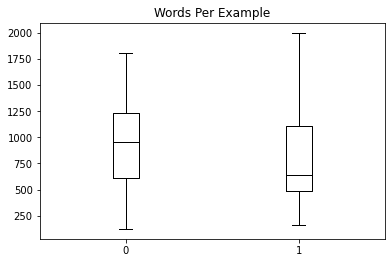

In [6]:
dX = wac2_model.X_test.str.split().apply(len)
dy = wac2_model.y_test
df = pd.DataFrame(columns=['Words Per Example', 'label'])
df["Words Per Example"] = dX
df["label"] = dy
df.boxplot("Words Per Example", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

,name,wiki_title,wiki_page,label
0,Andres Jaque,Andrés Jaque,Andrés Jaque is an architect. His work explore...,1
1,Ann Grimes,Ann Dowd,"Ann Dowd (born January 30, 1956) is an America...",0
2,Betsy West,Betsy Damon,"\n== Early life and career ==\nBorn in 1940, B...",0
3,Bjarne Stroustrup,Bjarne Stroustrup,Bjarne Stroustrup (; Danish: [ˈpjaːnə ˈstʁʌwˀs...,1
4,Brian Greene,Brian Greene,"Brian Randolph Greene (born February 9, 1963) ...",1


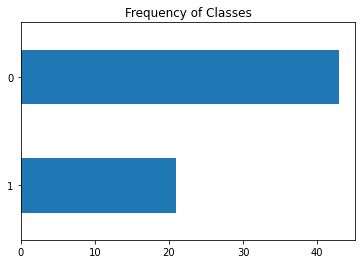

,name,department,course_descr,wiki_title,wiki_page,label
0,Ole Mathisen,Music,None,Ole Mathisen,Ole Mathisen (born 13 February 1965) is a Norw...,1
1,Paula Span,Journalism,The master’s project will be your most sustain...,Paula S. Apsell,"Paula S. Apsell (born July 4, 1947) is the tel...",0
2,Rebecca Godfrey,Summer Session (SUMM); Writing,,Rebecca Godfrey,Rebecca Godfrey is a novelist and non-fiction ...,1
3,Reinhold Martin,"Architecture, Planning and Preservation",,Reinhold Martin,Reinhold Martin (born 1964) is an American arc...,1
4,Richard Locke,Writing,.\n,Richard Locke,Richard Locke is an American critic and essayi...,1


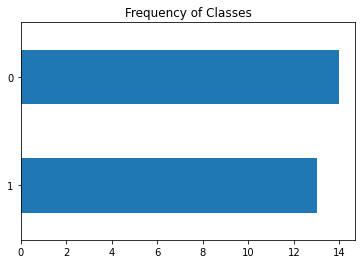

In [7]:
import pandas as pd

wiki_dataset_train.set_format(type="pandas")
df = wiki_dataset_train[:]
display(df.head())
df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

wiki_dataset_test.set_format(type="pandas")
df = wiki_dataset_test[:]
display(df.head())
df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

wiki_dataset_train.set_format(type=None)
wiki_dataset_test.set_format(type=None)